### Project Predicting Industrial Machine Maintenance

Implementing machine learning models and comparing their performance using a dataset of Industrial Machine Maintenance.

Dataset: ficticius data sensors machine - 179 columns and 11500 rows with target.

In [134]:
# Install
!pip install -q xgboost

^C


In [ ]:
# Imports
import pickle
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# load dataset
data = pd.read_csv('dataset.csv')

In [ ]:
data.shape

(11500, 179)

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,VARIAVEL_ALVO
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.00000

In [ ]:
data.rename(columns={'VARIAVEL_ALVO': 'TARGET'}, inplace=True)

In [ ]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,TARGET
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
# Missing Values
data.isna().sum().sum()

0

In [ ]:
# Missing values
data.isnull().values.any()

False

In [ ]:
# duplicated values
data.duplicated().sum()

0

In [ ]:
count_target = data['TARGET'].value_counts()
count_target

TARGET
0    9200
1    2300
Name: count, dtype: int64

In [ ]:
perc_target = data['TARGET'].value_counts(normalize=True)*100
perc_target

TARGET
0    80.0
1    20.0
Name: proportion, dtype: float64

In [ ]:
tab_target = pd.DataFrame({'Contagem': count_target, 'Percent Target%': perc_target})
tab_target

,Contagem,Percent Target%
TARGET,,
0,9200,80.0
1,2300,20.0


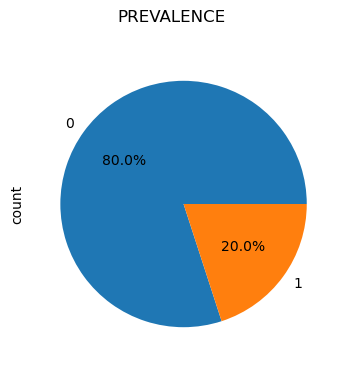

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('PREVALENCE')
data['TARGET'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'TARGET'],
      dtype='object', length=179)

In [ ]:
list_columns = data.columns.tolist()
list_columns

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X121',
 'X122',
 'X123',
 

In [ ]:
columns_entry = list_columns[0:178]
columns_entry

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X65',
 'X66',
 'X67',
 'X68',
 'X69',
 'X70',
 'X71',
 'X72',
 'X73',
 'X74',
 'X75',
 'X76',
 'X77',
 'X78',
 'X79',
 'X80',
 'X81',
 'X82',
 'X83',
 'X84',
 'X85',
 'X86',
 'X87',
 'X88',
 'X89',
 'X90',
 'X91',
 'X92',
 'X93',
 'X94',
 'X95',
 'X96',
 'X97',
 'X98',
 'X99',
 'X100',
 'X101',
 'X102',
 'X103',
 'X104',
 'X105',
 'X106',
 'X107',
 'X108',
 'X109',
 'X110',
 'X111',
 'X112',
 'X113',
 'X114',
 'X115',
 'X116',
 'X117',
 'X118',
 'X119',
 'X120',
 'X121',
 'X122',
 'X123',
 

In [ ]:
data['TARGET'].dtypes

dtype('int64')

In [ ]:
data = data.sample(n = len(data))

In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data_valid_test = data.sample(frac= 0.3)
print("Size valid/test: %.1f" % (len(data_valid_test)/len(data))) 

Size valid/test: 0.3


In [ ]:
# Division 70/15/15

data_test = data_valid_test.sample(frac = 0.5)

data_valid = data_valid_test.drop(data_test.index)

data_train = data.drop(data_valid_test.index)

In [ ]:
def calcul_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

In [ ]:
print("Positive Prevalence: %.3f"% calcul_prevalence(data["TARGET"].values))

Positive Prevalence: 0.200


In [ ]:
# Verifique a prevalência de cada subconjunto
print("Test(n = %d): %.3f" % (len(data_test), calcul_prevalence(data_test.TARGET.values)))
print("Valid(n = %d): %.3f" % (len(data_valid), calcul_prevalence(data_valid.TARGET.values)))
print("Train(n = %d): %.3f" % (len(data_train), calcul_prevalence(data_train.TARGET.values)))

Test(n = 1725): 0.190
Valid(n = 1725): 0.203
Train(n = 8050): 0.201


In [ ]:
print('All samples (n = %d)'%len(data))
assert len(data) == (len(data_test) + len(data_valid) + len(data_train)), 'wrong'

All samples (n = 11500)


In [ ]:
# Class Balance

# Indice
rows_pos = data_train.TARGET == 1

In [ ]:
# Indices values positives and negatives

data_train_pos = data_train.loc[rows_pos]
data_train_neg = data_train.loc[~rows_pos]

In [ ]:
# Min value
n = np.min([len(data_train_pos), len(data_train_neg)])

In [ ]:
print(n)

1622


In [ ]:
# Random Values for data train
data_train_final = pd.concat([data_train_pos.sample(n = n, random_state=64), 
                              data_train_neg.sample(n = n, random_state= 64)],
                             axis=0,
                             ignore_index=True)

In [ ]:
# Sample
data_train_final = data_train_final.sample(n = len(data_train_final), random_state= 64).reset_index(drop=True)

In [ ]:
print('Train Balance(n= %d): %.3f'%(len(data_train_final),
                                    calcul_prevalence(data_train_final.TARGET.values)))

Train Balance(n= 3244): 0.500


In [ ]:
# Save datasets to disk
data_train.to_csv('data_train.csv', index = False)
data_train_final.to_csv('data_train_final.csv', index = False)
data_valid.to_csv('data_valid.csv', index = False)
data_test.to_csv('data_test.csv', index = False)

In [ ]:
# Save entry variables 
pickle.dump(columns_entry, open('columns_entry.sav', 'wb'))

In [ ]:
# matrix
X_train = data_train_final[columns_entry].values
X_valid = data_valid[columns_entry].values

In [ ]:
#Y
y_train = data_train_final['TARGET'].values
y_valid = data_valid['TARGET'].values

In [ ]:
# Print
print('Train shape:', X_train.shape, y_train.shape)
print('Valid shape:', X_valid.shape, y_valid.shape)

Train shape: (3244, 178) (3244,)
Valid shape: (1725, 178) (1725,)


In [ ]:
X_train

array([[ 103,   94,   75, ...,  -56,  -81, -104],
       [ 346,  401,  483, ...,  560,  534,  476],
       [ 435,  196, -129, ...,  -86,   15,  106],
       ...,
       [  46,   35,   10, ...,  -61,  -40,  -12],
       [ 461,  466,  579, ..., -497,  -45,  357],
       [  34,   35,   30, ...,   18,   27,   23]], dtype=int64)

In [ ]:
# Standard
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Save 
scalerfile = 'scaler.sav'

In [ ]:
pickle.dump(scaler, open(scalerfile, 'wb'))
scaler = pickle.load(open(scalerfile, 'rb'))

In [ ]:
# Standar in matrizes
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [ ]:
X_train_tf

array([[ 0.4945069 ,  0.45580115,  0.37371805, ..., -0.16484418,
        -0.27347812, -0.36492305],
       [ 1.47626733,  1.70407838,  2.04795628, ...,  2.45204511,
         2.30521596,  2.00944417],
       [ 1.83584213,  0.87053821, -0.46340107, ..., -0.29229009,
         0.12904974,  0.49476163],
       ...,
       [ 0.26421742,  0.21590423,  0.10698892, ..., -0.18608517,
        -0.10156518,  0.01170072],
       [ 1.94088646,  1.9683716 ,  2.44189469, ..., -2.03829902,
        -0.12253017,  1.52228951],
       [ 0.21573542,  0.21590423,  0.18905942, ...,  0.14952239,
         0.17936572,  0.1549815 ]])

#### Modeling

In [ ]:
# Functions Metrics
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

In [ ]:
def metrics_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    
    print('AUC:%.3f'%auc)
    print('Accuracy:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precision:%.3f'%precision)
    print('Specificity:%.3f'%specificity)
    print(' ')
    
    return auc, accuracy, recall, precision, specificity 

In [ ]:
thresh = 0.5

In [ ]:
# Model 1 - Logistic Regression

lr = LogisticRegression(max_iter=500, random_state=142)

lr_model = lr.fit(X_train_tf, y_train)

y_train_preds = lr_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = lr_model.predict_proba(X_valid_tf)[:, 1]

print('\nLogistic Regression\n')

print('Training:\n')
_train_auc, v1_train_acc, v1_train_rec, v1_train_prec, v1_train_spec = metrics_report(y_train, 
                                                                                          y_train_preds, 
                                                                                          thresh)

print('Validation:\n')
v1_valid_auc, v1_valid_acc, v1_valid_rec, v1_valid_prec, v1_valid_spec = metrics_report(y_valid, 
                                                                                          y_valid_preds, 
                                                                                          thresh)



Logistic Regression

Training:

AUC:0.625
Accuracy:0.659
Recall:0.534
Precision:0.713
Specificity:0.785
 
Validation:

AUC:0.488
Accuracy:0.716
Recall:0.417
Precision:0.338
Specificity:0.792
 


In [135]:
# Model 2 - Naive Bayes - GaussianNB 

nb = GaussianNB()

nb_model = nb.fit(X_train_tf, y_train)

y_train_preds = nb_model.predict_proba(X_train_tf)[:, 1]
y_valid_preds = nb_model.predict_proba(X_valid_tf)[:, 1]

print('\nNaive Bayes\n')

print('Training:\n')
v2_train_auc, v2_train_acc, v2_train_rec, v2_train_prec, v2_train_spec = metrics_report(y_train, 
                                                                                          y_train_preds, 
                                                                                          thresh)

print('Validation:\n')
v2_valid_auc, v2_valid_acc, v2_valid_rec, v2_valid_prec, v2_valid_spec = metrics_report(y_valid, 
                                                                                          y_valid_preds, 
                                                                                          thresh)


Naive Bayes

Training:

AUC:0.983
Accuracy:0.937
Recall:0.903
Precision:0.969
Specificity:0.971
 
Validation:

AUC:0.982
Accuracy:0.954
Recall:0.889
Precision:0.886
Specificity:0.971
 


In [137]:
# Model 3 - XGBoost
xgbc = XGBClassifier()

# Treina e cria o modelo
xgbc_model = xgbc.fit(X_train_tf, y_train)

# Previsões
y_train_preds = xgbc_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = xgbc_model.predict_proba(X_valid_tf)[:,1]

print('\nXtreme Gradient Boosting Classifier\n')

print('Treinamento:\n')
v3_train_auc, v3_train_acc, v3_train_rec, v3_train_prec, v3_train_spec = metrics_report(y_train, 
                                                                                          y_train_preds, 
                                                                                          thresh)

print('Validação:\n')
v3_valid_auc, v3_valid_acc, v3_valid_rec, v3_valid_prec, v3_valid_spec = metrics_report(y_valid, 
                                                                                          y_valid_preds, 
                                                                                          thresh)


Xtreme Gradient Boosting Classifier

Treinamento:

AUC:1.000
Accuracy:1.000
Recall:1.000
Precision:1.000
Specificity:1.000
 
Validação:

AUC:0.992
Accuracy:0.966
Recall:0.940
Precision:0.896
Specificity:0.972
 


In [138]:
# Cross Validation

xgbc = XGBClassifier()

n_splits = 5
score = 'roc_auc'

cv_scores = cross_val_score(xgbc, X_train_tf, y_train, cv = n_splits, scoring = score)


# Display the results
print(f"Cross Validation with {n_splits} splits")
print(f"AUC Score in Each Split: {cv_scores}")
print(f"Average AUC Score: {np.mean(cv_scores)}")


Cross Validation with 5 splits
AUC Score in Each Split: [0.98962013 0.99325736 0.99145299 0.98953466 0.99588477]
Average AUC Score: 0.9919499841722063


In [141]:

%%time

## Otimizador Hyperparameters - GridSearchCV


xgbc = XGBClassifier()

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(xgbc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1)


grid_search.fit(X_train_tf, y_train)


best_params = grid_search.best_params_


xgbc_otimized_model = grid_search.best_estimator_


y_train_preds_optimized = xgbc_otimized_model.predict_proba(X_train_tf)[:,1]
y_valid_preds_optimized = xgbc_otimized_model.predict_proba(X_valid_tf)[:,1]


print('\nXtreme Gradient Boosting Classifier - Otimized\n')
print('Best hyperparameters:', best_params)

print('\nTraining:\n')
v4_train_auc, v4_train_acc, v4_train_rec, v4_train_prec, v4_train_spec = metrics_report(y_train, 
                                                                                          y_train_preds_optimized, 
                                                                                          thresh)

print('Validation:\n')
v4_valid_auc, v4_valid_acc, v4_valid_rec, v4_valid_prec, v4_valid_spec = metrics_report(y_valid, 
                                                                                          y_valid_preds_optimized, 
                                                                                          thresh)


Xtreme Gradient Boosting Classifier - Otimized

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

Training:

AUC:1.000
Accuracy:1.000
Recall:1.000
Precision:1.000
Specificity:1.000
 
Validation:

AUC:0.993
Accuracy:0.963
Recall:0.943
Precision:0.885
Specificity:0.969
 
CPU times: total: 13.2 s
Wall time: 3min 3s


In [142]:
# Best Model


results = pd.DataFrame({'classifier_model':['RL','RL','NB','NB','XGB','XGB','XGB_O','XGB_O'],
                           'data_set':['train','validation'] * 4,
                           'auc':[v1_train_acc,
                                  v1_valid_auc,
                                  v2_train_auc,
                                  v2_valid_auc,
                                  v3_train_auc,
                                  v3_valid_auc,
                                  v4_train_auc,
                                  v4_valid_auc],
                           'accuracy':[v1_train_acc,
                                       v1_valid_acc,
                                       v2_train_acc,
                                       v2_valid_acc,
                                       v3_train_acc,
                                       v3_valid_acc,
                                       v4_train_acc,
                                       v4_valid_acc],
                           'recall':[v1_train_rec,
                                     v1_valid_rec,
                                     v2_train_rec,
                                     v2_valid_rec,
                                     v3_train_rec,
                                     v3_valid_rec,
                                     v4_train_rec,
                                     v4_valid_rec],
                           'precision':[v1_train_prec,
                                        v1_valid_prec,
                                        v2_train_prec,
                                        v2_valid_prec,
                                        v3_train_prec,
                                        v3_valid_prec,
                                        v4_train_prec,
                                        v4_valid_prec],
                           'specificity':[v1_train_spec,
                                          v1_valid_spec,
                                          v2_train_spec,
                                          v2_valid_spec,
                                          v3_train_spec,
                                          v3_valid_spec,
                                          v4_train_spec,
                                          v4_valid_spec]})

In [143]:
results

,classifier_model,data_set,auc,accuracy,recall,precision,specificity
0,RL,train,0.659371,0.659371,0.533909,0.712757,0.784834
1,RL,validation,0.487663,0.715942,0.417143,0.337963,0.792000
2,NB,train,0.983187,0.937115,0.903206,0.968915,0.971023
3,NB,validation,0.981554,0.954203,0.888571,0.886040,0.970909
4,XGB,train,1.000000,1.000000,1.000000,1.000000,1.000000
5,XGB,validation,0.992189,0.965797,0.940000,0.896458,0.972364
6,XGB_O,train,1.000000,1.000000,1.000000,1.000000,1.000000
7,XGB_O,validation,0.993037,0.963478,0.942857,0.884718,0.968727


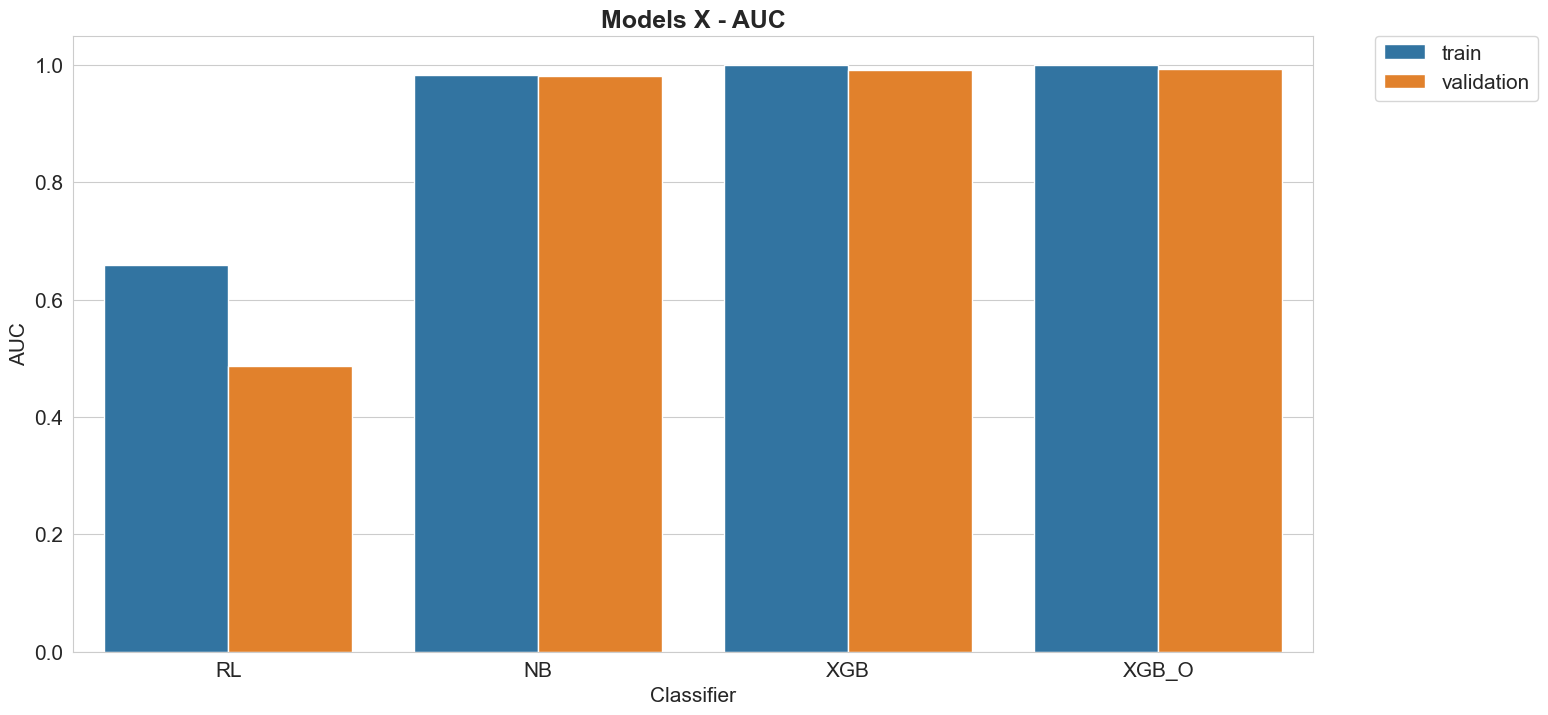

In [147]:
# Plot
sns.set_style("whitegrid")
plt.figure(figsize = (16, 8))

# Gráfico de barras
ax = sns.barplot(x = 'classifier_model', y = 'auc', hue = 'data_set', data = results)
ax.set_title("Models X - AUC", fontsize=18, fontweight="bold")
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

# Legenda
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)
plt.show();

In [149]:
# Tabela de comparação dos modelos somente com métricas em validação e ordenado por AUC
results[results['data_set'] == 'validation'].sort_values(by = 'auc', ascending = False)

,classifier_model,data_set,auc,accuracy,recall,precision,specificity
7,XGB_O,validation,0.993037,0.963478,0.942857,0.884718,0.968727
5,XGB,validation,0.992189,0.965797,0.940000,0.896458,0.972364
3,NB,validation,0.981554,0.954203,0.888571,0.886040,0.970909
1,RL,validation,0.487663,0.715942,0.417143,0.337963,0.792000


In [150]:
# Save the best model
pickle.dump(xgbc_otimized_model, open('best_model_xgbc.pkl', 'wb'), protocol = 4)

In [151]:

best_model = pickle.load(open('best_model_xgbc.pkl','rb'))
cols_input = pickle.load(open('columns_entry.sav','rb'))
scaler = pickle.load(open('scaler.sav', 'rb'))

# Load data
data_train = pd.read_csv('data_train.csv')
data_valid= pd.read_csv('data_valid.csv')
data_test= pd.read_csv('data_test.csv')

# matrizes x and y

# X
X_train = data_train[cols_input].values
X_valid = data_valid[cols_input].values
X_test = data_test[cols_input].values

# Y
y_train = data_train['TARGET'].values
y_valid = data_valid['TARGET'].values
y_test = data_test['TARGET'].values

# transform 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [152]:
# Prob 
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [153]:
# Avaliation
thresh = 0.5

print('\nTrainning:\n')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = metrics_report(y_train,
                                                                                               y_train_preds, 
                                                                                               thresh)

print('\nValidation:\n')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = metrics_report(y_valid,
                                                                                               y_valid_preds, 
                                                                                               thresh)

print('\nTest:\n')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = metrics_report(y_test,
                                                                                          y_test_preds, 
                                                                                          thresh)


Trainning:

AUC:0.999
Accuracy:0.981
Recall:1.000
Precision:0.913
Specificity:0.976
 

Validation:

AUC:0.993
Accuracy:0.963
Recall:0.943
Precision:0.885
Specificity:0.969
 

Test:

AUC:0.995
Accuracy:0.967
Recall:0.951
Precision:0.884
Specificity:0.971
 


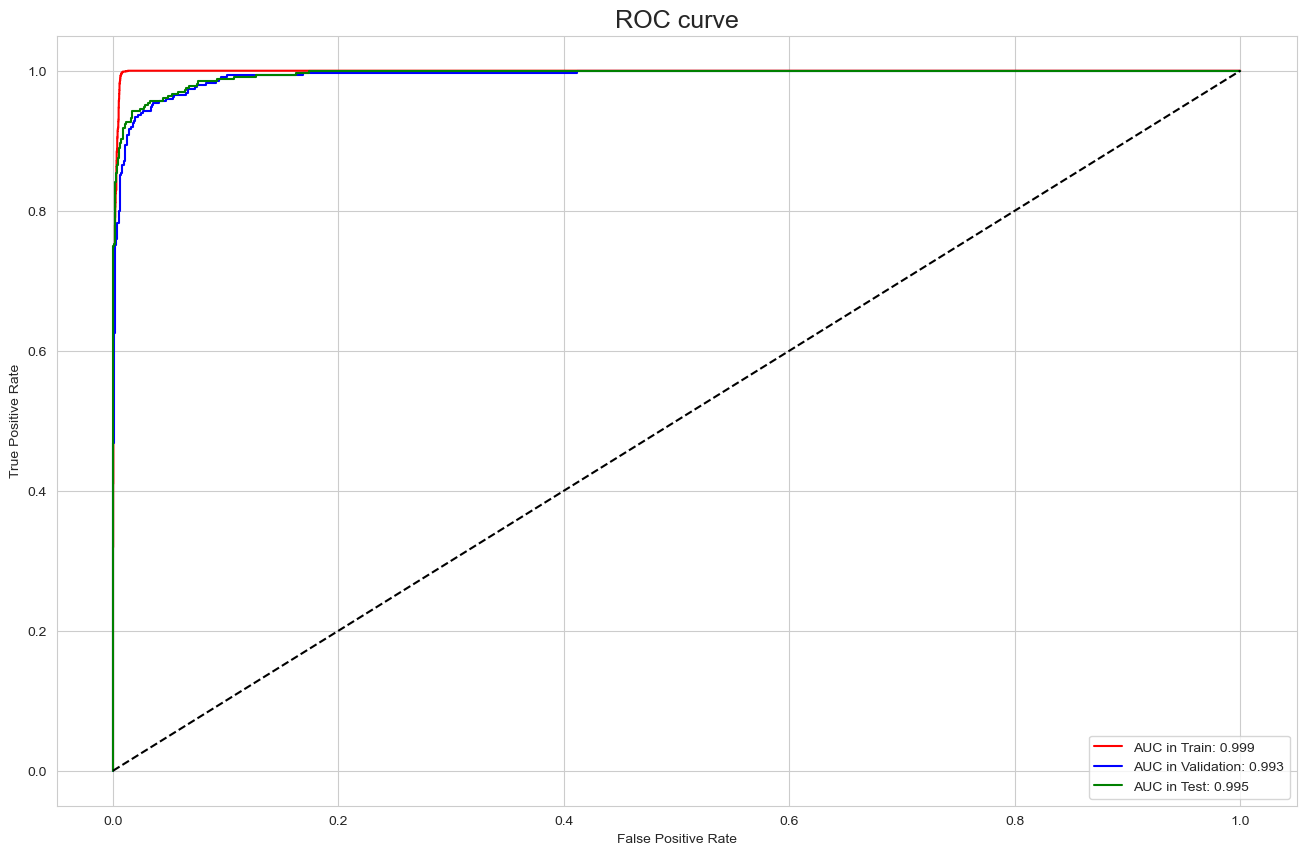

In [164]:
# ROC curve in train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

# ROC curve in validation
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

# ROC curve in test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

# Plot
plt.figure(figsize=(16,10))
plt.title("ROC curve", fontsize=18,)
plt.plot(fpr_train, tpr_train, 'r-', label = 'AUC in Train: %.3f' % auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-', label = 'AUC in Validation: %.3f' % auc_valid)
plt.plot(fpr_test, tpr_test, 'g-', label = 'AUC in Test: %.3f' % auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Deploy 

In [156]:
# New data
new_data = pd.read_csv('new_data.csv')

In [157]:
new_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,51,43,34,21,13,12,6,4,1,-4,-13,-21,-26,-26,-21,-18,-18,-20,-16,-14,-18,-13,-7,-3,-2,1,8,14,20,18,13,1,-2,-5,1,6,13,21,24,33,...,25,17,14,12,7,6,5,2,7,17,26,28,35,32,27,17,7,-2,-7,-15,-26,-42,-48,-49,-60,-68,-79,-78,-74,-59,-41,-16,2,22,33,45,56,67,69,63


In [158]:
# apply tranform
scaled_new_data = scaler.transform(new_data)

In [159]:
scaled_new_data

array([[ 2.84418247e-01,  2.48432622e-01,  2.05473520e-01,
         1.40050923e-01,  9.28284985e-02,  7.41148236e-02,
         4.06010838e-02,  3.26530026e-02,  2.03630267e-02,
        -4.66656715e-03, -4.65283604e-02, -7.88313569e-02,
        -8.89485550e-02, -7.85593697e-02, -5.58036500e-02,
        -4.50480291e-02, -4.84479895e-02, -6.01434783e-02,
        -4.45697001e-02, -3.69503808e-02, -5.42286004e-02,
        -3.39052902e-02, -6.83919208e-03,  7.77523705e-03,
         2.97529649e-03,  2.52121301e-03,  2.61892751e-02,
         4.97816281e-02,  8.11237880e-02,  8.25071440e-02,
         6.94818633e-02,  2.06170467e-02,  3.66002583e-03,
        -1.55145499e-02,  5.12265545e-03,  3.08181106e-02,
         7.05034644e-02,  1.11585926e-01,  1.28935356e-01,
         1.61193820e-01,  1.71199054e-01,  1.86756830e-01,
         1.76063584e-01,  1.90678175e-01,  1.83273390e-01,
         1.77512813e-01,  1.67835584e-01,  1.32025872e-01,
         7.77200376e-02,  3.51870438e-02,  2.11371359e-0

In [160]:
# Prevision
best_model.predict(scaled_new_data)

array([0])

In [161]:
new_prediction = best_model.predict(scaled_new_data)

In [162]:
# Resultado
if new_prediction[0] == 0:
    print("According to the sensors, this machine does not need maintenance.")
else:
    print("According to the sensors, this machine could probably need maintenance. Trigger human verification!")

According to the sensors, this machine does not need maintenance.
